In [ ]:
%pip install lifelines pandas matplotlib

In [1]:
import pandas as pd

In [10]:
df = pd.read_csv("dataset.csv", sep=";")
df = pd.get_dummies(df, columns=["team", "provider"], drop_first=True)
df.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team_TeamB,team_TeamC,provider_Provider2,provider_Provider3,provider_Provider4
0,56,0,92.178854,104.230204,96.517159,False,False,False,False,True
1,81,1,72.075938,103.065701,87.271062,False,True,False,False,True
2,60,0,96.272254,77.801376,112.196170,False,False,False,False,False
3,86,1,94.406461,108.493608,72.025374,False,True,True,False,False
4,34,0,97.752899,99.413492,103.756271,True,False,False,False,False


In [21]:
from lifelines import CoxPHFitter
from lifelines.utils import k_fold_cross_validation

cph = CoxPHFitter(penalizer=0.1)

scores = k_fold_cross_validation(
    cph,
    df,
    duration_col="lifetime",
    event_col="broken",
    k=5,
    scoring_method="concordance_index",
)
print(scores)

[0.9901046084252191, 0.9869125520523498, 0.9754028837998303, 0.9863420427553444, 0.9982993197278912]


In [22]:
cph.fit(df, duration_col="lifetime", event_col="broken", show_progress=True)
cph.print_summary()

Iteration 1: norm_delta = 1.69e+00, step_size = 0.9500, log_lik = -2038.27367, newton_decrement = 3.14e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 3.07e-01, step_size = 0.9500, log_lik = -1746.78943, newton_decrement = 1.07e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.41e-02, step_size = 0.9500, log_lik = -1736.22167, newton_decrement = 2.39e-02, seconds_since_start = 0.0
Iteration 4: norm_delta = 3.72e-05, step_size = 1.0000, log_lik = -1736.19768, newton_decrement = 1.95e-07, seconds_since_start = 0.0
Iteration 5: norm_delta = 3.26e-10, step_size = 1.0000, log_lik = -1736.19768, newton_decrement = 1.51e-17, seconds_since_start = 0.0
Convergence success after 5 iterations.


<lifelines.CoxPHFitter: fitted with 1000 total observations, 603 right-censored observations>
             duration col = 'lifetime'
                event col = 'broken'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 397
   partial log-likelihood = -1736.20
         time fit was run = 2024-09-14 15:44:36 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
pressureInd         0.00      1.00      0.00           -0.00            0.00                1.00                1.00
moistureInd        -0.00      1.00      0.00           -0.01            0.01                0.99                1.01
temperatureInd      0.01      1.01      0.00            0.00            0.01                1.00                1.01
team_TeamB         -0.12      0.88      0.10           -0.32            0.07                0.73                1.08
team_TeamC          1.09      2.96      0.12            0.85            1.32                2.34                3.76
provider_Provider2 -2.35      0.10      0.15           -2.64           -2.06                0.07                0.13
provider_Provider3  2.34     10.41      0.16            2.03            2.66                7.60               14.27
provider_Provider4 -1.43      0.24      0.14           -1.69           -1.16                0.18                0.31

                    cmp to      z      p  -log2(p)
covariate                                         
pressureInd           0.00   0.10   0.92      0.12
moistureInd           0.00  -0.85   0.39      1.34
temperatureInd        0.00   3.18 <0.005      9.41
team_TeamB            0.00  -1.24   0.22      2.21
team_TeamC            0.00   8.96 <0.005     61.43
provider_Provider2    0.00 -15.91 <0.005    186.96
provider_Provider3    0.00  14.56 <0.005    157.19
provider_Provider4    0.00 -10.54 <0.005     83.84
---
Concordance = 0.99
Partial AIC = 3488.40
log-likelihood ratio test = 604.15 on 8 df
-log2(p) of ll-ratio test = 413.66

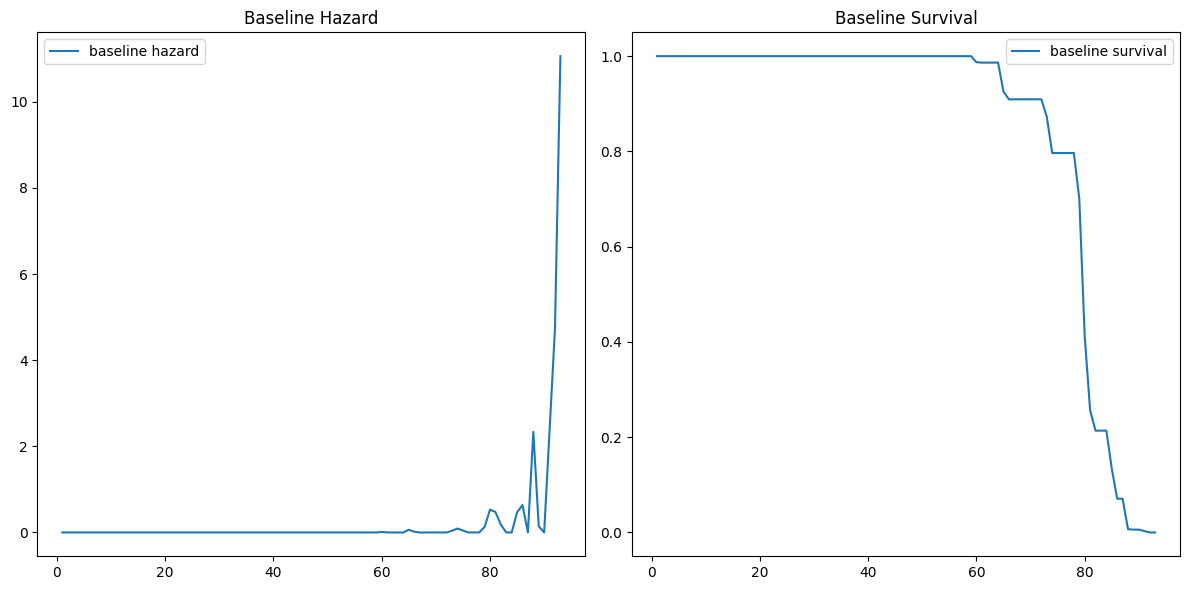

In [27]:
import matplotlib.pyplot as plt

# Step 2: Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Step 3: Plot baseline hazard in the first subplot
cph.baseline_hazard_.plot(ax=ax1)
ax1.set_title("Baseline Hazard")

# Step 4: Plot baseline survival in the second subplot
cph.baseline_survival_.plot(ax=ax2)
ax2.set_title("Baseline Survival")

# Step 5: Display the plots
plt.tight_layout()
plt.show()